In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math as mh 
import pandas as pd
from tqdm import tqdm
import os
#import NEATM
from NEATM2 import *
#constant
Fsun = 1367.5           # sun constant
sigma = 5.67E-8         #stefan-boltzmann constant
h = 6.626007015E-34     #plank constant
#q = 0.29+0.684*0.15    #phase integral = 0.29+0.684*G(=0.15)
epsi = 0.9             #radiance epsilon
kB = 1.38064852E-23     #boltzmann constant  j/k
cl = 299792458.0        #lightspeed m/s
au = 149597870700.0
pi = 3.1415926535
Rsun = 0.00465*au   #Rsun *m
Tsun = 5778         #Tsun  K
Hv = 22.1
G = 0.15
Ndd = 15
lamdai = [4.6,12,22]

### load epoch & cal epoch , define "x"

In [2]:
name = '2014FD7'
#df = pd.read_table(f'ws.dat.{name}')
ast = np.loadtxt(f'ws.dat.{name}',skiprows=1,usecols=(5,6,7))
ear = np.loadtxt(f'ws.dat.{name}',skiprows=1,usecols=(8,9,10))
#ast-sun
d_N = np.sqrt(ast[:,0]**2+ast[:,1]**2+ast[:,2]**2)
#print('ast-sun',d_N)
#ast-earth
delta_N = np.sqrt((ast[:,0]-ear[:,0])**2+(ast[:,1]-ear[:,1])**2+(ast[:,2]-ear[:,2])**2)
#print('ast-earth',delta_N)
#earth-sun
dd_N = np.sqrt(ear[:,0]**2+ear[:,1]**2+ear[:,2]**2)
#print('earth-sun',dd_N)
#alpha
alpha_N = (delta_N*delta_N+d_N*d_N-dd_N*dd_N)/(2*delta_N*d_N)
alpha_N = np.arccos(alpha_N)
x = (delta_N,d_N,alpha_N)

### load obs data , define "y"

In [3]:
time = np.loadtxt(f'mba.jd.{name}')
mjdtime = time-2400000.5
obsdat = np.loadtxt(f'obsNEW.txt.{name}')
n4 = len(obsdat)//4
w1 = obsdat[:n4]
w2 = obsdat[n4:2*n4]
w3 = obsdat[2*n4:n4*3]
w4 = obsdat[n4*3:]
'''plt.subplot(2,1,1)
plt.plot(mjdtime[:n3//2+5],w2[:n3//2+5],'bo',label='w2')
plt.plot(mjdtime[:n3//2+5],w3[:n3//2+5],'yo',label='w3')
plt.plot(mjdtime[:n3//2+5],w4[:n3//2+5],'ro',label='w4')
plt.subplot(2,1,2)
plt.plot(mjdtime[n3//2+5:],w2[n3//2+5:],'bo',label='w2')
plt.plot(mjdtime[n3//2+5:],w3[n3//2+5:],'yo',label='w3')
plt.plot(mjdtime[n3//2+5:],w4[n3//2+5:],'ro',label='w4')
plt.legend()'''
y = obsdat

## model

In [4]:
def Model_neatm_Ref_jhx(theta,x,lamda):
    '''
    theta = (eta,D,wf)
    x = (astp,obsp)
    x = (3.4x;4.6x;12x;22x)
    '''
    eta,D,wf  = theta
    astp,obsp = x
    lamda2,lamda3,lamda4 = lamda
    #print('k',astp)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    flux = np.zeros(n4*4)
    for i in range(n4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda2,eta,A,Hv)
        flux[i] = 1.3917*fluxi + 1.0049*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(n4,2*n4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda2,eta,A,Hv)
        flux[i] = 1.1124*fluxi + 1.0193*(wf*frLambi + frLommi)
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(2*n4,n4*3):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda3,eta,A,Hv)
        flux[i] = 0.8791*fluxi 
        #print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    for i in range(n4*3,n4*4):
        fluxi,frLambi,frLommi = get_flux_ref(astp[i],obsp[i],D,lamda4,eta,A,Hv)
        flux[i] = 0.9865*fluxi     
       # print(f'{i}:ast{astp[i]} obs{obsp[i]} flux {flux[i]}')
    return flux    

### cal flux with ref

/home/astrohhq/learngit/newwisedata/test/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


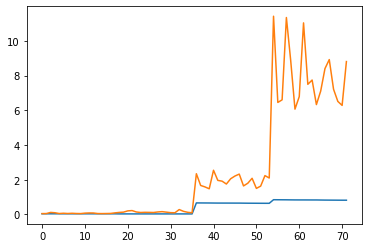

In [5]:
xast = np.vstack((ast,ast,ast,ast))
xear  =  np.vstack((ear,ear,ear,ear))
xt = (xast,xear)
flux = Model_neatm_Ref_jhx((1.5,115,0.5),xt,(4.6,12,22))
plt.plot(flux)
plt.plot(y)

## LC


In [25]:
#initial
eta_gs = 1.2
D_gs = 150
eta_gss = [0.5,4,0.02]
D_gss = [200,500,1]
wf_gs = 0.2
wf_gss = [0,0.5]
test = [2.17, 324, 0.257]

LossFunction =  59.10457558049393


/home/astrohhq/learngit/newwisedata/test/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/test/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


[2.17, 324, 0.257]

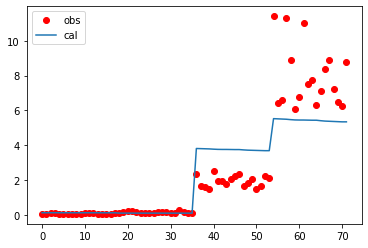

In [26]:
def loss(obs,cal,err):
    l = len(obs)
    return sum(((obs-cal)/err)**2)/l
print('LossFunction = ',loss(y,Model_neatm_Ref_jhx(test,xt,lamdai),y*0.1))
plt.plot(y,'ro',label='obs')
plt.plot(Model_neatm_Ref_jhx(test,xt,lamdai),label='cal')
plt.legend()
test

In [27]:
n_eta = int((eta_gss[1]-eta_gss[0])/eta_gss[2]+1)                     
n_D = int((D_gss[1]-D_gss[0])/D_gss[2]+1)
Ntime = n_eta*n_D         
print(f'It`s need {Ntime} setps',f'eta={n_eta} d={n_D}')

It`s need 52976 setps eta=176 d=301


In [29]:
minloss = 10e6
nstep = 0
Di = D_gss[0]
for i in tqdm(range(n_D)):
    etai = eta_gss[0]
    for j in tqdm(range(n_eta), leave=False):
        flux = np.zeros(n4)
        testi = [etai,Di,0.257]
        flux = Model_neatm_Ref_jhx(testi,xt,lamdai)
        lossi = loss(y,flux,y*0.1)
        #print(f'step {nstep} :loss = {lossi} eta = {etai} D = {Di}')
        if lossi<minloss :
            minloss = lossi
            eta_fit = etai
            D_fit  = Di
            print(f'step {nstep} :loss = {lossi} eta = {eta_fit} D = {D_fit}')
        etai = etai + eta_gss[2]
        #print(etai)
        nstep = nstep + 1
    Di = Di + D_gss[2]

  0%|          | 0/301 [00:00<?, ?it/s]

step 0 :loss = 11437.944771182909 eta = 0.5 D = 200
step 1 :loss = 9744.631275499223 eta = 0.52 D = 200
step 2 :loss = 8335.078853914365 eta = 0.54 D = 200


step 3 :loss = 7155.724817990094 eta = 0.56 D = 200
step 4 :loss = 6164.271798323167 eta = 0.5800000000000001 D = 200


step 5 :loss = 5327.079039390377 eta = 0.6000000000000001 D = 200
step 6 :loss = 4617.211680513535 eta = 0.6200000000000001 D = 200


step 7 :loss = 4012.968941479564 eta = 0.6400000000000001 D = 200
step 8 :loss = 3496.76430365399 eta = 0.6600000000000001 D = 200


step 9 :loss = 3054.2667912875454 eta = 0.6800000000000002 D = 200
step 10 :loss = 2673.737602028342 eta = 0.7000000000000002 D = 200
step 11 :loss = 2345.5140790932023 eta = 0.7200000000000002 D = 200


step 12 :loss = 2061.6056643580796 eta = 0.7400000000000002 D = 200
step 13 :loss = 1815.3755709950456 eta = 0.7600000000000002 D = 200
step 14 :loss = 1601.2885196067302 eta = 0.7800000000000002 D = 200


step 15 :loss = 1414.7097170094723 eta = 0.8000000000000003 D = 200
step 16 :loss = 1251.7438244097661 eta = 0.8200000000000003 D = 200


step 17 :loss = 1109.1053138516902 eta = 0.8400000000000003 D = 200
step 18 :loss = 984.0135974838587 eta = 0.8600000000000003 D = 200
step 19 :loss = 874.1078109707431 eta = 0.8800000000000003 D = 200


step 20 :loss = 777.3772679094589 eta = 0.9000000000000004 D = 200
step 21 :loss = 692.1044688898003 eta = 0.9200000000000004 D = 200


step 22 :loss = 616.818214341352 eta = 0.9400000000000004 D = 200
step 23 :loss = 550.2548841430996 eta = 0.9600000000000004 D = 200
step 24 :loss = 491.3263458177727 eta = 0.9800000000000004 D = 200


step 25 :loss = 439.09326431080876 eta = 1.0000000000000004 D = 200
step 26 :loss = 392.7428303221831 eta = 1.0200000000000005 D = 200
step 27 :loss = 351.57011633303773 eta = 1.0400000000000005 D = 200


step 28 :loss = 314.9624215263287 eta = 1.0600000000000005 D = 200
step 29 :loss = 282.3860876365914 eta = 1.0800000000000005 D = 200
step 30 :loss = 253.37536418837337 eta = 1.1000000000000005 D = 200


step 31 :loss = 227.52297883532887 eta = 1.1200000000000006 D = 200
step 32 :loss = 204.4721306427192 eta = 1.1400000000000006 D = 200
step 33 :loss = 183.9096743104078 eta = 1.1600000000000006 D = 200


step 34 :loss = 165.5603039647245 eta = 1.1800000000000006 D = 200
step 35 :loss = 149.1815781775603 eta = 1.2000000000000006 D = 200


step 36 :loss = 134.55965481110687 eta = 1.2200000000000006 D = 200
step 37 :loss = 121.50562633032216 eta = 1.2400000000000007 D = 200
step 38 :loss = 109.85236431842029 eta = 1.2600000000000007 D = 200


step 39 :loss = 99.45179682602823 eta = 1.2800000000000007 D = 200
step 40 :loss = 90.17255448300858 eta = 1.3000000000000007 D = 200
step 41 :loss = 81.89793148464156 eta = 1.3200000000000007 D = 200


step 42 :loss = 74.52411601783034 eta = 1.3400000000000007 D = 200
step 43 :loss = 67.95865173029297 eta = 1.3600000000000008 D = 200
step 44 :loss = 62.11909771868303 eta = 1.3800000000000008 D = 200


step 45 :loss = 56.931859425096164 eta = 1.4000000000000008 D = 200
step 46 :loss = 52.33116695210102 eta = 1.4200000000000008 D = 200
step 47 :loss = 48.25818077029169 eta = 1.4400000000000008 D = 200


step 48 :loss = 44.66020771073805 eta = 1.4600000000000009 D = 200
step 49 :loss = 41.49001259889923 eta = 1.4800000000000009 D = 200
step 50 :loss = 38.705212971752445 eta = 1.5000000000000009 D = 200


step 51 :loss = 36.26774608803035 eta = 1.520000000000001 D = 200
step 52 :loss = 34.14339894380403 eta = 1.540000000000001 D = 200
step 53 :loss = 32.301393284689226 eta = 1.560000000000001 D = 200


step 54 :loss = 30.71401869695636 eta = 1.580000000000001 D = 200
step 55 :loss = 29.356307792195807 eta = 1.600000000000001 D = 200


step 56 :loss = 28.205748298433342 eta = 1.620000000000001 D = 200
step 57 :loss = 27.242027555227416 eta = 1.640000000000001 D = 200
step 58 :loss = 26.446805498489432 eta = 1.660000000000001 D = 200


step 59 :loss = 25.803512726989247 eta = 1.680000000000001 D = 200
step 60 :loss = 25.2971706788856 eta = 1.700000000000001 D = 200
step 61 :loss = 24.914231323396674 eta = 1.720000000000001 D = 200


step 62 :loss = 24.642434098550055 eta = 1.740000000000001 D = 200
step 63 :loss = 24.47067810814651 eta = 1.7600000000000011 D = 200
step 64 :loss = 24.388907835845398 eta = 1.7800000000000011 D = 200


step 65 :loss = 24.38801084690377 eta = 1.8000000000000012 D = 200


  0%|          | 1/301 [00:19<1:36:42, 19.34s/it]


step 240 :loss = 24.316668141663165 eta = 1.7800000000000011 D = 201
step 241 :loss = 24.284963788071448 eta = 1.8000000000000012 D = 201


  1%|          | 2/301 [00:38<1:36:57, 19.46s/it]


step 416 :loss = 24.258619419900697 eta = 1.7800000000000011 D = 202
step 417 :loss = 24.19530573415174 eta = 1.8000000000000012 D = 202


  1%|          | 3/301 [00:58<1:36:25, 19.41s/it]


step 593 :loss = 24.119244724482694 eta = 1.8000000000000012 D = 203
step 594 :loss = 24.103974251648907 eta = 1.8200000000000012 D = 203


  1%|▏         | 4/301 [01:16<1:33:00, 18.79s/it]

step 769 :loss = 24.056989823085395 eta = 1.8000000000000012 D = 204
step 770 :loss = 24.011197190321532 eta = 1.8200000000000012 D = 204


  2%|▏         | 5/301 [01:34<1:31:27, 18.54s/it]


step 945 :loss = 24.00875111885236 eta = 1.8000000000000012 D = 205
step 946 :loss = 23.931657555051665 eta = 1.8200000000000012 D = 205


  2%|▏         | 6/301 [01:52<1:31:37, 18.63s/it]


step 1122 :loss = 23.865557201548395 eta = 1.8200000000000012 D = 206
step 1123 :loss = 23.83638817263167 eta = 1.8400000000000012 D = 206


  2%|▏         | 7/301 [02:11<1:31:09, 18.61s/it]


step 1298 :loss = 23.81309896564277 eta = 1.8200000000000012 D = 207
step 1299 :loss = 23.753696720086754 eta = 1.8400000000000012 D = 207


  3%|▎         | 8/301 [02:29<1:30:24, 18.51s/it]


step 1475 :loss = 23.68409478281595 eta = 1.8400000000000012 D = 208
step 1476 :loss = 23.670688350343198 eta = 1.8600000000000012 D = 208


  3%|▎         | 9/301 [02:48<1:30:13, 18.54s/it]


step 1651 :loss = 23.627778306391846 eta = 1.8400000000000012 D = 209
step 1652 :loss = 23.585156768004033 eta = 1.8600000000000012 D = 209


  3%|▎         | 10/301 [03:06<1:29:49, 18.52s/it]


step 1827 :loss = 23.58494417448175 eta = 1.8400000000000012 D = 210
step 1828 :loss = 23.512381076833652 eta = 1.8600000000000012 D = 210


  4%|▎         | 11/301 [03:25<1:29:48, 18.58s/it]


step 2004 :loss = 23.45255067300346 eta = 1.8600000000000012 D = 211
step 2005 :loss = 23.425836684432856 eta = 1.8800000000000012 D = 211


  4%|▍         | 12/301 [03:44<1:29:14, 18.53s/it]


step 2180 :loss = 23.405855850983418 eta = 1.8600000000000012 D = 212
step 2181 :loss = 23.350199807590798 eta = 1.8800000000000012 D = 212


  4%|▍         | 13/301 [04:02<1:28:52, 18.52s/it]


step 2357 :loss = 23.28718364564266 eta = 1.8800000000000012 D = 213
step 2358 :loss = 23.275539859122908 eta = 1.9000000000000012 D = 213


  5%|▍         | 14/301 [04:20<1:28:21, 18.47s/it]


step 2533 :loss = 23.236972226531577 eta = 1.8800000000000012 D = 214
step 2534 :loss = 23.197339838717987 eta = 1.9000000000000012 D = 214


  5%|▍         | 15/301 [04:39<1:27:50, 18.43s/it]


step 2710 :loss = 23.13145073308271 eta = 1.9000000000000012 D = 215


  5%|▌         | 16/301 [04:57<1:27:12, 18.36s/it]


step 2886 :loss = 23.078050607137147 eta = 1.9000000000000012 D = 216
step 2887 :loss = 23.053595094026875 eta = 1.9200000000000013 D = 216


  6%|▌         | 17/301 [05:15<1:26:59, 18.38s/it]


step 3062 :loss = 23.037318351177664 eta = 1.9000000000000012 D = 217
step 3063 :loss = 22.98513125071179 eta = 1.9200000000000013 D = 217


  6%|▌         | 18/301 [05:34<1:26:37, 18.37s/it]


step 3239 :loss = 22.92885490297383 eta = 1.9200000000000013 D = 218
step 3240 :loss = 22.918764473852747 eta = 1.9400000000000013 D = 218


  6%|▋         | 19/301 [05:52<1:26:26, 18.39s/it]


step 3415 :loss = 22.884939230196025 eta = 1.9200000000000013 D = 219
step 3416 :loss = 22.848010196880928 eta = 1.9400000000000013 D = 219


  7%|▋         | 20/301 [06:11<1:26:09, 18.40s/it]


step 3592 :loss = 22.78915546126821 eta = 1.9400000000000013 D = 220


  7%|▋         | 21/301 [06:29<1:25:49, 18.39s/it]


step 3768 :loss = 22.742368006299028 eta = 1.9400000000000013 D = 221
step 3769 :loss = 22.719878128190786 eta = 1.9600000000000013 D = 221


  7%|▋         | 22/301 [06:47<1:25:41, 18.43s/it]


step 3944 :loss = 22.70781633147771 eta = 1.9400000000000013 D = 222
step 3945 :loss = 22.658728900762387 eta = 1.9600000000000013 D = 222


  8%|▊         | 23/301 [07:07<1:27:12, 18.82s/it]


step 4121 :loss = 22.609366640025094 eta = 1.9600000000000013 D = 223
step 4122 :loss = 22.600531034240106 eta = 1.9800000000000013 D = 223


  8%|▊         | 24/301 [07:26<1:27:04, 18.86s/it]


step 4297 :loss = 22.571954630528626 eta = 1.9600000000000013 D = 224
step 4298 :loss = 22.537357948096027 eta = 1.9800000000000013 D = 224


  8%|▊         | 25/301 [07:45<1:26:56, 18.90s/it]


step 4474 :loss = 22.485703917237174 eta = 1.9800000000000013 D = 225


  9%|▊         | 26/301 [08:04<1:26:31, 18.88s/it]


step 4650 :loss = 22.445727253400985 eta = 1.9800000000000013 D = 226
step 4651 :loss = 22.4248312764003 eta = 2.0000000000000013 D = 226


  9%|▉         | 27/301 [08:23<1:26:14, 18.89s/it]


step 4826 :loss = 22.417586970180892 eta = 1.9800000000000013 D = 227
step 4827 :loss = 22.371155248824678 eta = 2.0000000000000013 D = 227


  9%|▉         | 28/301 [08:42<1:26:25, 19.00s/it]


step 5003 :loss = 22.328895696880792 eta = 2.0000000000000013 D = 228
step 5004 :loss = 22.320943346349978 eta = 2.0200000000000014 D = 228


 10%|▉         | 29/301 [09:01<1:26:27, 19.07s/it]


step 5179 :loss = 22.298206862805703 eta = 2.0000000000000013 D = 229
step 5180 :loss = 22.26550247521416 eta = 2.0200000000000014 D = 229


 10%|▉         | 30/301 [09:20<1:26:08, 19.07s/it]


step 5356 :loss = 22.221228567280363 eta = 2.0200000000000014 D = 230


 10%|█         | 31/301 [09:39<1:25:37, 19.03s/it]

step 5532 :loss = 22.188271310366265 eta = 2.0200000000000014 D = 231
step 5533 :loss = 22.16853367573519 eta = 2.0400000000000014 D = 231


 11%|█         | 32/301 [09:58<1:25:15, 19.02s/it]


step 5708 :loss = 22.166781041738165 eta = 2.0200000000000014 D = 232
step 5709 :loss = 22.122501352970087 eta = 2.0400000000000014 D = 232


 11%|█         | 33/301 [10:17<1:24:47, 18.98s/it]

step 5885 :loss = 22.087542619809728 eta = 2.0400000000000014 D = 233
step 5886 :loss = 22.08004298286276 eta = 2.0600000000000014 D = 233


 11%|█▏        | 34/301 [10:36<1:24:12, 18.92s/it]


step 6061 :loss = 22.06380343970378 eta = 2.0400000000000014 D = 234
step 6062 :loss = 22.032496204015203 eta = 2.0600000000000014 D = 234


 12%|█▏        | 35/301 [10:55<1:23:58, 18.94s/it]


step 6238 :loss = 21.995790402310675 eta = 2.0600000000000014 D = 235


 12%|█▏        | 36/301 [11:14<1:23:51, 18.99s/it]


step 6414 :loss = 21.970067362114474 eta = 2.0600000000000014 D = 236
step 6415 :loss = 21.951001718767778 eta = 2.0800000000000014 D = 236


 12%|█▏        | 37/301 [11:33<1:23:19, 18.94s/it]


step 6591 :loss = 21.912791325141516 eta = 2.0800000000000014 D = 237


 13%|█▎        | 38/301 [11:52<1:22:50, 18.90s/it]


step 6767 :loss = 21.885337009788614 eta = 2.0800000000000014 D = 238
step 6768 :loss = 21.87781273725616 eta = 2.1000000000000014 D = 238


 13%|█▎        | 39/301 [12:11<1:22:43, 18.94s/it]


step 6943 :loss = 21.868777142474762 eta = 2.0800000000000014 D = 239
step 6944 :loss = 21.838328872438005 eta = 2.1000000000000014 D = 239


 13%|█▎        | 40/301 [12:30<1:22:32, 18.98s/it]


step 7120 :loss = 21.80938400602276 eta = 2.1000000000000014 D = 240


 14%|█▎        | 41/301 [12:49<1:22:13, 18.97s/it]


step 7296 :loss = 21.791112666029424 eta = 2.1000000000000014 D = 241
step 7297 :loss = 21.77219311455601 eta = 2.1200000000000014 D = 241


 14%|█▍        | 42/301 [13:08<1:21:51, 18.96s/it]


step 7473 :loss = 21.74198713334145 eta = 2.1200000000000014 D = 242


 14%|█▍        | 43/301 [13:27<1:21:36, 18.98s/it]


step 7649 :loss = 21.722243049524245 eta = 2.1200000000000014 D = 243
step 7650 :loss = 21.714180485721602 eta = 2.1400000000000015 D = 243


 15%|█▍        | 44/301 [13:46<1:21:11, 18.96s/it]

step 7825 :loss = 21.713092255044586 eta = 2.1200000000000014 D = 244
step 7826 :loss = 21.682932080504084 eta = 2.1400000000000015 D = 244


 15%|█▍        | 45/301 [14:05<1:21:01, 18.99s/it]


step 8002 :loss = 21.661942777624077 eta = 2.1400000000000015 D = 245


 15%|█▌        | 46/301 [14:24<1:20:48, 19.01s/it]


step 8178 :loss = 21.651340431014248 eta = 2.1400000000000015 D = 246
step 8179 :loss = 21.632011199346188 eta = 2.1600000000000015 D = 246


 16%|█▌        | 47/301 [14:43<1:20:25, 19.00s/it]


step 8355 :loss = 21.609993537181158 eta = 2.1600000000000015 D = 247


 16%|█▌        | 48/301 [15:01<1:19:38, 18.89s/it]


step 8531 :loss = 21.59816504853956 eta = 2.1600000000000015 D = 248
step 8532 :loss = 21.58902327104976 eta = 2.1800000000000015 D = 248


 16%|█▋        | 49/301 [15:20<1:19:02, 18.82s/it]


step 8708 :loss = 21.566183954807755 eta = 2.1800000000000015 D = 249


 17%|█▋        | 50/301 [15:39<1:18:45, 18.83s/it]

step 8884 :loss = 21.55334416270254 eta = 2.1800000000000015 D = 250


 17%|█▋        | 51/301 [15:58<1:18:29, 18.84s/it]


step 9060 :loss = 21.550625599410523 eta = 2.1800000000000015 D = 251
step 9061 :loss = 21.530309345196706 eta = 2.2000000000000015 D = 251


 17%|█▋        | 52/301 [16:17<1:18:17, 18.87s/it]


step 9237 :loss = 21.516663023043677 eta = 2.2000000000000015 D = 252


 18%|█▊        | 53/301 [16:36<1:17:54, 18.85s/it]

step 9413 :loss = 21.512952890635134 eta = 2.2000000000000015 D = 253
step 9414 :loss = 21.502171469703278 eta = 2.2200000000000015 D = 253


 18%|█▊        | 54/301 [16:54<1:17:36, 18.85s/it]


step 9590 :loss = 21.487913805333136 eta = 2.2200000000000015 D = 254


 18%|█▊        | 55/301 [17:14<1:17:40, 18.95s/it]


step 9766 :loss = 21.483414786547517 eta = 2.2200000000000015 D = 255
step 9767 :loss = 21.48157830472642 eta = 2.2400000000000015 D = 255


 19%|█▊        | 56/301 [17:32<1:17:05, 18.88s/it]

step 9943 :loss = 21.4668953547278 eta = 2.2400000000000015 D = 256


 19%|█▉        | 57/301 [17:51<1:16:57, 18.92s/it]


step 10119 :loss = 21.46180064225624 eta = 2.2400000000000015 D = 257


 19%|█▉        | 58/301 [18:10<1:16:46, 18.96s/it]


step 10296 :loss = 21.453412939769528 eta = 2.2600000000000016 D = 258


 20%|█▉        | 59/301 [18:30<1:16:43, 19.02s/it]


step 10472 :loss = 21.44790668623704 eta = 2.2600000000000016 D = 259


 20%|█▉        | 60/301 [18:49<1:16:34, 19.06s/it]


step 10649 :loss = 21.447278016709156 eta = 2.2800000000000016 D = 260


 20%|██        | 61/301 [19:08<1:16:00, 19.00s/it]


step 10825 :loss = 21.44153576112814 eta = 2.2800000000000016 D = 261


100%|██████████| 301/301 [1:31:48<00:00, 18.30s/it]


/home/astrohhq/learngit/newwisedata/test/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
/home/astrohhq/learngit/newwisedata/test/NEATM2.py:188: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * math.cos(phi[j])**2 * np.abs(math.cos(alpha - theta[k]))  / (exp(h * c / (wlenth * kb * temp[j,k])) - 1) * dphi * dtheta * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


21.44153576112814

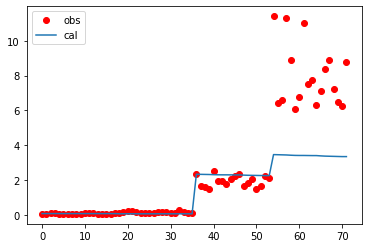

In [32]:
fitans = [eta_fit,D_fit,0.257]
plt.plot(y,'ro',label='obs')
plt.plot(Model_neatm_Ref_jhx(fitans,xt,lamdai),label='cal')
plt.legend()
loss(Model_neatm_Ref_jhx(fitans,xt,lamdai),y,y*0.1)